In [41]:
import tensorflow as tf
import modules.layers as tf_util
import modules.utility as util
import numpy as np
import tables
import matplotlib
%matplotlib inline
matplotlib.rcParams['font.size'] = 14
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
from IPython.display import display, Javascript
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from medpy.metric.binary import hd, assd,dc,precision
# plt.style.use('ggplot')


disable_js = """
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
"""

def disable_scroll():
    display(Javascript(disable_js))
    print ("autoscrolling long output is disabled")
    
disable_scroll()

import logging
logger = logging.getLogger()
logger.setLevel(logging.ERROR)

<IPython.core.display.Javascript object>

autoscrolling long output is disabled


In [2]:
strings = []
dices = []
for code in ERRORS.keys():
    e_d_m = np.mean(ERRORS[code]['dice'])
    e_d_s = np.std(ERRORS[code]['dice'])
    
    e_j_m = np.mean(ERRORS[code]['jaccard'])
    e_j_s = np.std(ERRORS[code]['jaccard'])
    
    e_hd_m = np.mean(ERRORS[code]['hausdorf'])
    e_hd_s = np.std(ERRORS[code]['hausdorf'])
    
    e_assd_m = np.mean(ERRORS[code]['assd'])
    e_assd_s = np.std(ERRORS[code]['assd'])
    
    e_ap_m = np.mean(ERRORS[code]['ap'])
    e_ap_s = np.std(ERRORS[code]['ap'])
    
    s =  "{} & ${:.3f}$ & ${:.3f}$ & ${:.3f}$ & ${:.3f}$ & ${:.3f}$\ \ ".format(code, 
                                                          e_d_m, 
                                                          e_j_m, 
                                                          e_hd_m,
                                                          e_assd_m,
                                                        e_ap_m)
    strings.append(s)
    dices.append(e_d_m)

a = sorted(zip(strings,dices), key = lambda x: x[1])
f = open('2derr_{}.txt'.format(CODE),'w')
print "code, dice, jaccard, hausdorf, assd, ap"
f.write("code, dice, jaccard, hausdorf, assd, ap\n")
for x in a:
    print x[0]
    f.write(x[0]+'\n')
f.close()

NameError: name 'ERRORS' is not defined

In [ ]:
S = 100

#subsample
for code in ERRORS.keys():
    for PTYPE in ['pr']:
        N = len(ERRORS[code][PTYPE][0])
        ERRORS[code][PTYPE+"_"] = []

        ERRORS[code][PTYPE+'_'].append([ERRORS[code][PTYPE][0][i] for i in range(0,N,S)] + [ERRORS[code][PTYPE][0][N-1]])
        ERRORS[code][PTYPE+'_'].append([ERRORS[code][PTYPE][1][i] for i in range(0,N,S)] + [ERRORS[code][PTYPE][1][N-1]])



In [17]:
from IPython.display import display, Javascript

disable_js = """
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
"""

def disable_scroll():
    display(Javascript(disable_js))
    print ("autoscrolling long output is disabled")
    
disable_scroll()
N=f_test.root.X.shape[0]
f = open('ct_test_list.txt','r').readlines()
for i in range(5):
    
    id_ = np.random.randint(N)
    print id_
    print f[id_]
    img = util.crop_center(f_test.root.X[id_,:,:,0],crop_dims,crop_dims)
    seg = util.crop_center(f_test.root.Y[id_,:,:,0],crop_dims,crop_dims)
    c   = f_test.root.C[id_]
    c_i2ifc = PREDS['i2ifc']['c'][id_]
    
    spacing = f_test.root.meta[i]
    extent = [-64*spacing[0],64*spacing[0],-64*spacing[1],64*spacing[1]]
    
    plt.figure()
    fig, (ax1, ax2, ax3, ax4, ax5, ax6,ax7) = plt.subplots(1, 7, sharey=True,figsize=(12,2))
    ax1.imshow(img,cmap='gray')
    ax2.imshow(seg,cmap='gray')
    ax3.imshow(PREDS['i2ifc']['y'][id_,:,:,0].astype(np.float32))
    ax4.imshow(PREDS['i2i']['y'][id_,:,:,0].astype(np.float32))
    ax5.imshow(PREDS['i2i3d']['y'][id_,:,:,0].astype(np.float32))
    ax6.imshow(PREDS['drls']['y'][id_,:,:,0].astype(np.float32))
    ax7.imshow(PREDS['drls_oof']['y'][id_,:,:,0].astype(np.float32))
    plt.title(f[id_])
    plt.tight_layout
    plt.savefig('../images/images_{}.png'.format(id_),dpi=500)
    plt.show()
    
    
    plt.imshow(img[:,:],cmap='gray',extent=extent)
    plt.plot(c[:,0],c[:,1],color='b',label='truth')
    plt.plot(c_i2ifc[:,0],c_i2ifc[:,1],color='r',label='i2ifc')
    plt.legend()
    plt.colorbar()
    plt.show()
    
    plt.figure()
    plt.imshow(seg,cmap='gray',extent=extent)
    plt.plot(c[:,0],c[:,1],color='b',label='truth')
    plt.plot(c_i2ifc[:,0],c_i2ifc[:,1],color='r',label='i2ifc')
    plt.legend()
    plt.colorbar()
    plt.show()

<IPython.core.display.Javascript object>

autoscrolling long output is disabled
4491


IndexError: list index out of range

In [5]:
#open pickle files
import cPickle as pickle
err_ct = pickle.load(open('ERRORS_CT.pkl','r'))
err_mr = pickle.load(open('ERRORS_MR.pkl','r'))
err_all = pickle.load(open('ERRORS_ALL.pkl','r'))


In [38]:
%matplotlib inline
from matplotlib import pylab as plt
import numpy as np
import pandas as pd
def plot_f_lines(ax=None,fig_size=None):
    if ax is None:
        fig,ax = plt.subplots(1,1)
    for f in np.array(np.arange(.1,1,.1)):
        r = np.squeeze(np.array([np.arange(f,1.01,.01)]))
        p = np.squeeze(np.array((f*r)/(2*r-f)))
        ax.plot(p,r,color=[0,1,0], linewidth=.5)
        ax.plot(r,p,color=[0,1,0], linewidth=.5);
        ax.set_xlim(0,1);ax.set_ylim(0,1)
        ax.set_xlabel('Recall');ax.set_ylabel('Precision')
        tcks=np.arange(0,1.1,.1)
        tcks_lab = map('{:g}'.format,tcks)
        ax.set_xticks(tcks);ax.set_yticks(tcks)
        ax.set_xticklabels(tcks_lab);ax.set_yticklabels(tcks_lab)
        ax.grid(1);ax.set_aspect('equal')
    if fig_size is not None:
        fig.set_figwidth(fig_size[1]);fig.set_figheight(fig_size[0])
    return fig,ax
def plot_result(R,P,ax=None,label=None, color=None,style='-',marker='.'):
    print(color)
    if ax is None:
        fig,ax = plt.subplots(1,1)
    if len(R)>1:
        handle = ax.plot(R,P,style,label=label,linewidth=2.5)
    else:
        handle = ax.plot(R,P,marker,label=label,markersize=13, linewidth=3)
    if color:
        handle[0].set_color(color)
    ax.set_xlim(0,1);ax.set_ylim(0,1)
    ax.set_xlabel('Recall');ax.set_ylabel('Precision')
    tcks=np.arange(0,1.1,.1)
    tcks_lab = map('{:g}'.format,tcks)
    ax.set_xticks(tcks);ax.set_yticks(tcks)
    ax.set_xticklabels(tcks_lab);ax.set_yticklabels(tcks_lab)
    ax.grid(1)

r
g
b
k
y
r
g
b
k
y


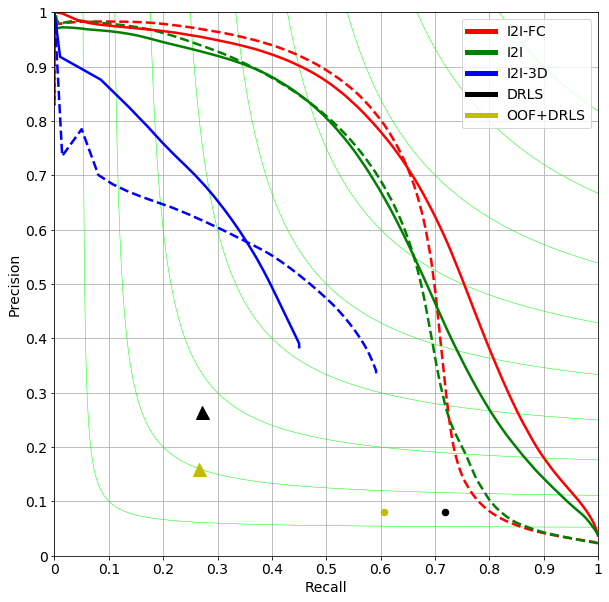

[<matplotlib.lines.Line2D object at 0x7fbd4be8fad0>, <matplotlib.lines.Line2D object at 0x7fbd5e70db10>, <matplotlib.lines.Line2D object at 0x7fbd5e70dc50>, <matplotlib.lines.Line2D object at 0x7fbd5e70dd90>, <matplotlib.lines.Line2D object at 0x7fbd5e70ded0>, <matplotlib.lines.Line2D object at 0x7fbd398de150>, <matplotlib.lines.Line2D object at 0x7fbd398dec50>, <matplotlib.lines.Line2D object at 0x7fbd398de5d0>, <matplotlib.lines.Line2D object at 0x7fbd398dec90>, <matplotlib.lines.Line2D object at 0x7fbd398de950>]


In [42]:
fig,ax = plot_f_lines(fig_size=(10,10))
legof = (.5, -0.05)
for c in ['mr','ct']:
    if c == 'mr':
        style = '--'
        marker = '.'
        key = ''
        ERRORS = err_mr
    if c == 'ct':
        style = '-'
        key = ''
        marker = '^'
        ERRORS = err_ct
    if c == 'overall':
        style = '-'
        key = ''
        marker = '.'
        ERRORS = err_all
        
#     plot_result(ERRORS['i2ifc']['pr_'][1], ERRORS['i2ifc']['pr_'][0], ax=ax, color='r', 
#                 label='[DICE={:.2f}] I2I-FC - {}'.format(
#                     np.mean(ERRORS['i2ifc']['dice']),key),style=style,marker=marker)

#     plot_result(ERRORS['i2i']['pr_'][1], ERRORS['i2i']['pr_'][0], ax=ax,color='g', 
#                 label='[DICE={:.2f}] I2I - {}'.format(
#                     np.mean(ERRORS['i2i']['dice']),key),style=style,marker=marker)

#     plot_result(ERRORS['i2i3d']['pr_'][1][1:], ERRORS['i2i3d']['pr_'][0][1:], ax=ax,color='b', 
#                 label='[DICE={:.2f}] I2I-3D - {}'.format(
#                     np.mean(ERRORS['i2i3d']['dice']),key),style=style,marker=marker)

#     plot_result(ERRORS['drls']['pr'][1][1:-1], ERRORS['drls']['pr'][0][1:-1], ax=ax,color='k', 
#                 label='[DICE={:.2f}] DRLS - {}'.format(
#                     np.mean(ERRORS['drls']['dice']),key),style=style,marker=marker)

#     plot_result(ERRORS['drls_oof']['pr'][1][1:-1], ERRORS['drls_oof']['pr'][0][1:-1], ax=ax,color='y', 
#                 label='[DICE={:.2f}] OOF+DRLS - {}'.format(
#                     np.mean(ERRORS['drls_oof']['dice']),key),style=style,marker=marker)

    plot_result(ERRORS['i2ifc']['pr_'][1], ERRORS['i2ifc']['pr_'][0], ax=ax, color='r', 
                label='I2I-FC',style=style,marker=marker)

    plot_result(ERRORS['i2i']['pr_'][1], ERRORS['i2i']['pr_'][0], ax=ax,color='g', 
                label='I2I',style=style,marker=marker)

    plot_result(ERRORS['i2i3d']['pr_'][1][1:], ERRORS['i2i3d']['pr_'][0][1:], ax=ax,color='b', 
                label='I2I-3D',style=style,marker=marker)

    plot_result(ERRORS['drls']['pr'][1][1:-1], ERRORS['drls']['pr'][0][1:-1], ax=ax,color='k', 
                label='DRLS',style=style,marker=marker)

    plot_result(ERRORS['drls_oof']['pr'][1][1:-1], ERRORS['drls_oof']['pr'][0][1:-1], ax=ax,color='y', 
                label='OOF+DRLS',style=style,marker=marker)

handles, labels = ax.get_legend_handles_labels()
handles2 = [plt.Line2D((0,1),(0,0), color=handle.get_c(), marker='', markersize=20, linestyle=style, linewidth=5) for handle in handles]

num_labels = len(labels)
ax.legend(handles2[:num_labels/2],labels[:num_labels/2],
          ncol=1,loc='upper right', numpoints=1,frameon=True)

#ax.legend(handles2[-num_labels/2:], labels[-num_labels/2:], bbox_to_anchor=(1.0, 1.0), frameon=True)
plt.show()
print handles2
fig.savefig('pr_combined.pdf', bbox_inches='tight')

In [20]:
import pickle
pickle.dump( ERRORS, open( "ERRORS_{}.pkl".format(CODE), "w" ) )